In [22]:
import warnings
warnings.filterwarnings("ignore")
import os
from rdkit import Chem
import MDAnalysis as mda;

In [2]:
import nglview
import mdtraj
traj = mdtraj.load('dat/dna1.pdb')
ngl_traj = nglview.MDTrajTrajectory(traj)
view = nglview.NGLWidget(ngl_traj);view

NGLWidget()

In [3]:
import nglview
import mdtraj
traj = mdtraj.load('dat/dna1.pdb')
ngl_traj = nglview.MDTrajTrajectory(traj)
view = nglview.NGLWidget(ngl_traj)
view

NGLWidget()

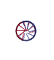

In [4]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles \
import PSF, DCD, GRO, XTC
import nglview
view = nglview.show_pdbid("1ilc")

In [5]:
view.add_ball_and_stick(selection="protein", 
color='blue');view

NGLWidget()

In [6]:
import MDAnalysis as mda
import nglview as nv
from nglview.datafiles import PDB
u = mda.Universe(PDB)
elements = mda.topology.guessers.guess_types(
    u.atoms.names)
u.add_TopologyAttr('elements', elements)
lig = u.select_atoms("resname LRT")
view = nv.show_mdanalysis(lig);view

NGLWidget()

In [7]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles \
import PSF, DCD, GRO, XTC
psf = mda.Universe(PSF)
print(psf)
print(hasattr(psf, 'trajectory'))
gro = mda.Universe(GRO)
print(gro)
print(len(gro.trajectory))
u = mda.Universe(PSF, DCD)
print(u)
print(len(u.trajectory))
structure_only = mda.Universe("dat/dna1.pdb")
print(u.residues)

<Universe with 3341 atoms>
False
<Universe with 47681 atoms>
1
<Universe with 3341 atoms>
98
<ResidueGroup [<Residue MET, 1>, <Residue ARG, 2>, <Residue ILE, 3>, ..., <Residue ILE, 212>, <Residue LEU, 213>, <Residue GLY, 214>]>


In [8]:
u.atoms;last_five = u.atoms[-5:];print(last_five)

<AtomGroup [<Atom 3337: HA1 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3338: HA2 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>]>


In [9]:
print(last_five[[0, 3, -1, 1, 3, 0]])

<AtomGroup [<Atom 3337: HA1 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3338: HA2 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3337: HA1 of type 6 of resname GLY, resid 214 and segid 4AKE>]>


In [10]:
print(u.select_atoms('resname ASP or resname GLU'))

<AtomGroup [<Atom 318: N of type 54 of resname GLU, resid 22 and segid 4AKE>, <Atom 319: HN of type 1 of resname GLU, resid 22 and segid 4AKE>, <Atom 320: CA of type 22 of resname GLU, resid 22 and segid 4AKE>, ..., <Atom 3271: OE2 of type 72 of resname GLU, resid 210 and segid 4AKE>, <Atom 3272: C of type 20 of resname GLU, resid 210 and segid 4AKE>, <Atom 3273: O of type 70 of resname GLU, resid 210 and segid 4AKE>]>


In [11]:
print(u.select_atoms('resid 50-100').n_residues)
print(u.residues[50:100].n_residues)

51
50


In [12]:
u.select_atoms("(resname GLU or resname HS*)\
and name CA and (resid 1:100)")
near_met = u.select_atoms('not resname MET and (around 2 resname MET)')
near_met.groupby(['resnames', 'names'])

{('ARG', 'N'): <AtomGroup with 1 atom>,
 ('THR', 'N'): <AtomGroup with 1 atom>,
 ('ILE', 'C'): <AtomGroup with 2 atoms>,
 ('ALA', 'HN'): <AtomGroup with 2 atoms>,
 ('ALA', 'C'): <AtomGroup with 1 atom>,
 ('GLN', 'C'): <AtomGroup with 1 atom>,
 ('ASN', 'O'): <AtomGroup with 1 atom>,
 ('ASP', 'N'): <AtomGroup with 1 atom>,
 ('ASP', 'C'): <AtomGroup with 1 atom>,
 ('LEU', 'N'): <AtomGroup with 1 atom>,
 ('LYS', 'N'): <AtomGroup with 1 atom>,
 ('GLU', 'N'): <AtomGroup with 1 atom>}

In [13]:
nhh = u.atoms[:3]
print(nhh.names)


['N' 'HT1' 'HT2']


In [14]:
angle_nhh = nhh.angle
print(angle_nhh.value())

37.99234750892497


In [15]:
for ts in u.trajectory[:20]:
    time = u.trajectory.time
    rgyr = u.atoms.radius_of_gyration()
    print("Frame: {:3d}, Time: {:4.0f} ps, \
    Rgyr: {:.4f} A".format(ts.frame, time, rgyr))

Frame:   0, Time:    1 ps,     Rgyr: 16.6690 A
Frame:   1, Time:    2 ps,     Rgyr: 16.6732 A
Frame:   2, Time:    3 ps,     Rgyr: 16.7315 A
Frame:   3, Time:    4 ps,     Rgyr: 16.7223 A
Frame:   4, Time:    5 ps,     Rgyr: 16.7440 A
Frame:   5, Time:    6 ps,     Rgyr: 16.7185 A
Frame:   6, Time:    7 ps,     Rgyr: 16.7741 A
Frame:   7, Time:    8 ps,     Rgyr: 16.7764 A
Frame:   8, Time:    9 ps,     Rgyr: 16.7894 A
Frame:   9, Time:   10 ps,     Rgyr: 16.8289 A
Frame:  10, Time:   11 ps,     Rgyr: 16.8521 A
Frame:  11, Time:   12 ps,     Rgyr: 16.8549 A
Frame:  12, Time:   13 ps,     Rgyr: 16.8723 A
Frame:  13, Time:   14 ps,     Rgyr: 16.9108 A
Frame:  14, Time:   15 ps,     Rgyr: 16.9494 A
Frame:  15, Time:   16 ps,     Rgyr: 16.9810 A
Frame:  16, Time:   17 ps,     Rgyr: 17.0033 A
Frame:  17, Time:   18 ps,     Rgyr: 17.0196 A
Frame:  18, Time:   19 ps,     Rgyr: 17.0784 A
Frame:  19, Time:   20 ps,     Rgyr: 17.1265 A


In [16]:
import warnings
warnings.filterwarnings("ignore")
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import TPR, XTC
import numpy as np
import nglview as nv
u = mda.Universe(TPR, XTC, in_memory=True)

In [17]:
view = nv.show_mdanalysis(u)
view.add_representation('point', 'resname SOL')
view.center()
view

NGLWidget(max_frame=9)

In [18]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.tests.datafiles import CRD, PSF, DCD, DCD2
import nglview as nv

In [19]:
adk_open = mda.Universe(CRD, DCD2)
nv.show_mdanalysis(adk_open)

NGLWidget(max_frame=101)

In [20]:
import MDAnalysis as mda
import nglview as nv
from nglview.datafiles import PDB
u = mda.Universe(PDB)
#elements = mda.topology.guessers.guess_types(
 #   u.atoms.names)
#u.add_TopologyAttr('elements', elements)
lig = u.select_atoms("resname LRT")
view = nv.show_mdanalysis(lig);view

NGLWidget()

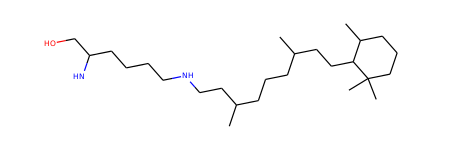

In [21]:
mol = Chem.MolFromPDBFile(PDB)
mol = Chem.SplitMolByPDBResidues(mol)["LRT"]
mol.RemoveAllConformers();mol